## Financial Wellbeing Score development

1. Number of months in the last year with payment dishonours (missed payments on credit cards etc -- how will this be represented in transaction data? Bank fees and charges?)


2. Any payday loans in the last year? (include BNPL)

3. Days in the last year with liquid balances below one week's average expenses - bank balance on any given day that is less than expected outgoings for that week. 

4. Days in the last year during which customer had the ability to raise one month's expenses from savings or available credit

5. Age normed percentile of customer's median savings balance over the last year

In [55]:
import pandas as pd
import pickle
import extract_time
import scores

import importlib
importlib.reload(scores)
importlib.reload(extract_time)

<module 'extract_time' from '/Users/ellie/Documents/Projects/user_scores/extract_time.py'>

In [4]:
with open('/Users/ellie/Documents/Projects/Models_Data/RawData/OBdata/test_df_05042022.pkl','rb') as f:
    data = pickle.load(f)

In [38]:
def outgoings(df):
    
    df_outgoings = df[df.type=='DEBIT']
    outgoings = round(0-df_outgoings['amount'].sum(),2)

    return outgoings

def income(df):
    
    df_income = df[df.type=='CREDIT']
    income = round(df_income['amount'].sum(),2)

    return income

In [56]:
def weekly_score(df:pd.DataFrame,measure:str):
    
    ''' '''

    b_score=[]   
    df_dates = extract_time.create_time_bins(df)

    for i in df_dates.index:

        if measure == 'outgoings':
            start = pd.Timestamp(df_dates.iloc[i]['per_start'])
            end =  pd.Timestamp(df_dates.iloc[i]['per_end'])
            df_week = df[(df.timestamp.dt.date>=start)&(df.timestamp.dt.date<end)]
            score = scores.outgoings(df_week)
            b_score.append(score)

        elif measure == 'budget':
            start = pd.Timestamp(df_dates.iloc[i]['per_start'])
            end =  pd.Timestamp(df_dates.iloc[i]['per_end'])
            df_week = df[(df.timestamp.dt.date>=start)&(df.timestamp.dt.date<end)]
            score = scores.budgeting_score(df_week)
            b_score.append(score)

        elif measure == 'income':
            start = pd.Timestamp(df_dates.iloc[i]['per_start'])
            end =  pd.Timestamp(df_dates.iloc[i]['per_end'])
            df_week = df[(df.timestamp.dt.date>=start)&(df.timestamp.dt.date<end)]
            score = scores.income(df_week)
            b_score.append(score)

    print(b_score)
    df_dates['score']=b_score
    df_dates['rolling_average']=df_dates['score'].rolling(4).mean().fillna(df_dates.score.mean())   
    current_score = round(sum(b_score[-4:])/4)

    print(f'Average for past 4 weeks: {current_score}')

    #print(f'Your budgeting score on {date.today().isoformat()} is {round(sum(b_score[-4:])/4)}. The maximum attainable score is 100')
    
    return df_dates

In [58]:
weekly_score(data,'budget')

[91]


/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


ValueError: Length of values (1) does not match length of index (13)

In [45]:
import scores_vis

Average weekly spend: £676


/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


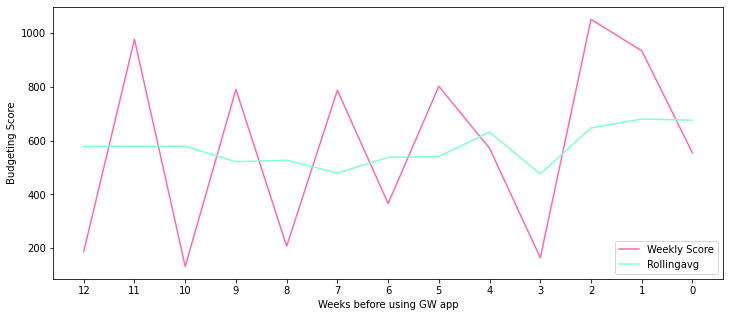

In [46]:
scores_vis.weekly_b_score(weekly_score(data))